In [15]:
from keras.datasets import imdb

In [16]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [17]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
word_index = imdb.get_word_index()
reverse_word_index = dict ([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [26]:
word_index.items()

rig', 18496), ('rid', 3764), ('rib', 23368), ('ric', 40761), ('ethnicity', 16502), ('blackwood', 14350), ("what'", 88186), ('ignacio', 88187), ('lengthy', 4670), ('yidische', 88188), ('eames', 88189), ('lengths', 11571), ('bacula', 88191), ("'certain", 88192), ('ideologies', 18497), ('propping', 51872), ('chicory', 88193), ('hester', 88194), ('apeal', 88195), ('minis', 27611), ('novelizations', 88196), ('devgn', 88197), ('targetting', 88198), ('brooding', 6040), ('moving', 725), ('incapacitated', 30665), ('uneasily', 88199), ('obit', 88200), ('noodle', 14351), ('castigates', 88201), ("shame's", 51873), ('solemnity', 34654), ('antoniette', 88202), ('limbaugh', 88203), ('abrasive', 17142), ('analysis', 4759), ('solids', 88204), ('castigated', 88205), ('broods', 34655), ('starved', 13415), ('huggie', 88206), ("'rangi", 88207), ('silvestres', 88208), ('bankrolls', 88209), ('reincarnates', 88210), ('misguiding', 88211), ('orientalism', 88212), ('trickle', 37476), ('mysteriosity', 88213), ('

In [20]:
import numpy as np

def vecorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vecorize_sequences(train_data)
x_test = vecorize_sequences(test_data)

In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.5087 - acc: 0.7890 - val_loss: 0.3724 - val_acc: 0.8737
Epoch 2/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.3031 - acc: 0.8994 - val_loss: 0.3141 - val_acc: 0.8807
Epoch 3/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2244 - acc: 0.9235 - val_loss: 0.2843 - val_acc: 0.8873
Epoch 4/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1749 - acc: 0.9435 - val_loss: 0.2752 - val_acc: 0.8900
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1431 - acc: 0.9539 - val_loss: 0.3239 - val_acc: 0.8742
Epoch 6/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1175 - acc: 0.9644 - val_loss: 0.2946 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.0968 - acc: 0.9715 - val_loss: 0.3374 -

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

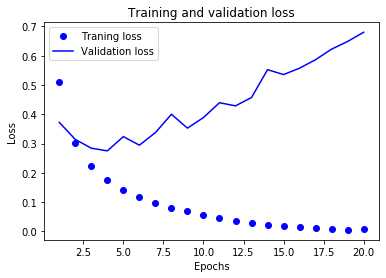

In [39]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Traning loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

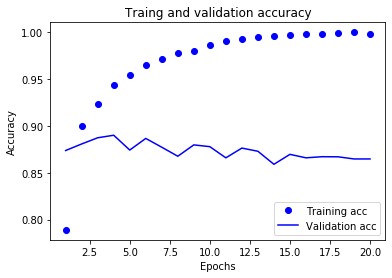

In [41]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()